ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **02Mar20**

# Laboratory Work 07 (03Mar20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|        Context            |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

---
### Table of Contents
* [Assignment 1 (50pts)](#a1) Stoichiometry analysis for a reaction mechanism for pyrolysis of propane.
 - [1.1)](#a11) Import reaction mechanism.
 - [1.2)](#a12) Species and stoichiometric data.
 - [1.3)](#a13) Principal reaction sub-mechanism(s). Explain your analysis in full.
* [Assignment 2 (50pts)](#a2) Least-squares reaction rates for a reaction mechanism for pyrolysis of ethyl-nitrite.
 - [2.1)](#a21) Import reaction mechanism.
 - [2.2)](#a22) Compute a reaction rate density vector from a given species production rate density vector.
 - [2.3)](#a23) Compute a unique reaction rate density from a manufactured species production rate density vector.
 ---

## <span style="color:blue">Assignment 1 (50 pts): For each item below respond in a separate notebook cell.</span>
<a id="a1"></a>

<span style="color:blue">
1.1) Import the following reaction mechanism for propane pyrolysis from the course repository: <b>data/propane-rxn.txt</b> and display the reactions.
</span><a id="a11"></a>

In [1]:
'''1.1 Import reaction mechanism'''


r0 :  C3H8 -> CH3* + C2H5*
r1 :  C2H5* -> C2H4 + H*
r2 :  C2H5* + C3H8 -> C2H6 + C3H7*
r3 :  CH3* + C3H8 -> CH4 + C3H7*
r4 :  C3H7* -> C2H4 + CH3*
r5 :  C3H7* -> C3H6 + H*
r6 :  C3H8 + H* -> H2 + C3H7*
r7 :  CH3* + C3H7* -> C3H6 + CH4
n_reactions = 8


<span style="color:blue">
1.2) Make an organized output of the species and stoichiometric data.
</span><a id="a12"></a>

['H2', 'C2H5*', 'CH4', 'CH3*', 'C3H7*', 'C2H4', 'H*', 'C3H6', 'C3H8', 'C2H6']
# species = 10

s_mtrx =
 [[ 0.  1.  0.  1.  0.  0.  0.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.  0.  0. -1.  1.]
 [ 0.  0.  1. -1.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  1. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0. -1.  0. -1.  0.]
 [ 0.  0.  1. -1. -1.  0.  0.  1.  0.  0.]]
m x n = (8, 10)
matrix shape = (8, 10)


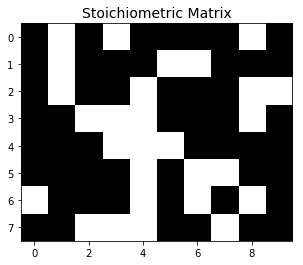


rank = 7


In [4]:
'''1.2 Species and stoichiometric data'''


<span style="color:blue">
1.3) What is(are) the most relevant reaction sub-mechanism(s)? Explain your analysis in full. Use your own algorithms for answering this question. Use `markdown` typesetting to organize your text.
</span><a id="a13"></a>

# reactions =  8
# species   =  10
rank of S =  7
# of all possible sub_mechanisms = 8
# of full-rank sub_mechanisms = 6


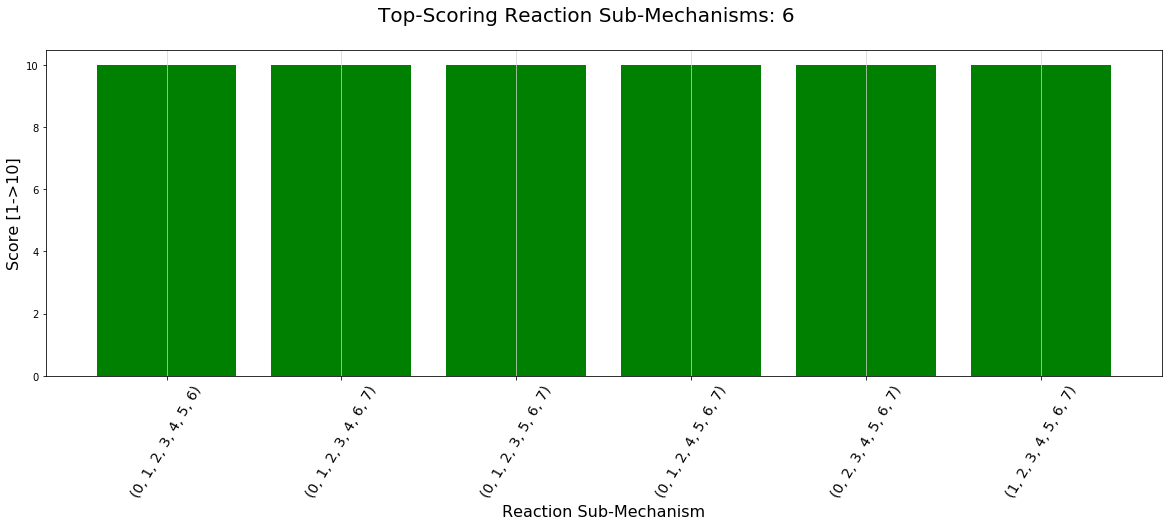

r0 :  C3H8 -> CH3* + C2H5*
r1 :  C2H5* -> C2H4 + H*
r2 :  C2H5* + C3H8 -> C2H6 + C3H7*
r3 :  CH3* + C3H8 -> CH4 + C3H7*
r4 :  C3H7* -> C2H4 + CH3*
r5 :  C3H7* -> C3H6 + H*
r6 :  C3H8 + H* -> H2 + C3H7*
r7 :  CH3* + C3H7* -> C3H6 + CH4
n_reactions = 8

Reaction Sub Mechanism: 0 (score 10.00)
r0 C3H8 -> CH3* + C2H5*
r1 C2H5* -> C2H4 + H*
r2 C2H5* + C3H8 -> C2H6 + C3H7*
r3 CH3* + C3H8 -> CH4 + C3H7*
r4 C3H7* -> C2H4 + CH3*
r5 C3H7* -> C3H6 + H*
r6 C3H8 + H* -> H2 + C3H7*
Reaction Sub Mechanism: 1 (score 10.00)
r0 C3H8 -> CH3* + C2H5*
r1 C2H5* -> C2H4 + H*
r2 C2H5* + C3H8 -> C2H6 + C3H7*
r3 CH3* + C3H8 -> CH4 + C3H7*
r4 C3H7* -> C2H4 + CH3*
r6 C3H8 + H* -> H2 + C3H7*
r7 CH3* + C3H7* -> C3H6 + CH4
Reaction Sub Mechanism: 2 (score 10.00)
r0 C3H8 -> CH3* + C2H5*
r1 C2H5* -> C2H4 + H*
r2 C2H5* + C3H8 -> C2H6 + C3H7*
r3 CH3* + C3H8 -> CH4 + C3H7*
r5 C3H7* -> C3H6 + H*
r6 C3H8 + H* -> H2 + C3H7*
r7 CH3* + C3H7* -> C3H6 + CH4
Reaction Sub Mechanism: 3 (score 10.00)
r0 C3H8 -> CH3* + C2H5*
r1 C2H5

In [5]:
'''1.3 Most relevant reaction sub-mechanisms'''


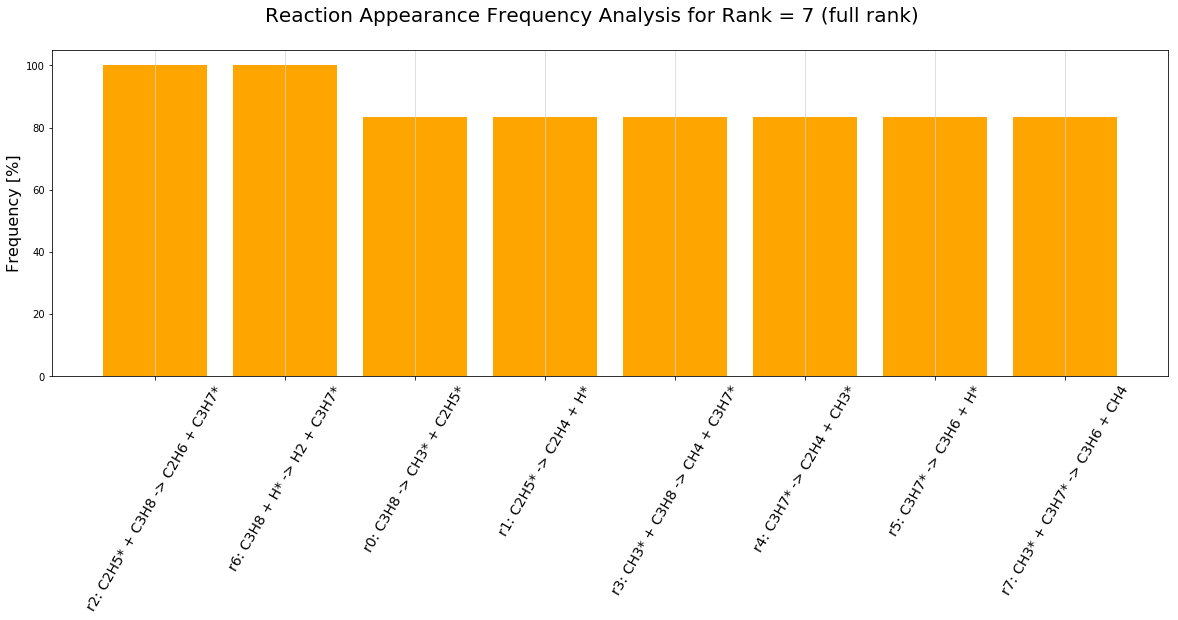

**1.3) Explain your analysis in full:**.

## <span style="color:blue">Assignment 2 (50 pts): For each item below respond in a separate notebook cell.</span>
<a id="a2"></a>

<span style="color:blue">
2.1) Import the following reaction mechanism for ethyl-nitrite pyrolysis from the course repository: <b>data/ethyl-nitrite-rxn.txt</b> and display the reactions.
</span><a id="a21"></a>

In [17]:
'''2.1 Import reaction mechanism'''


r0 :  C2H5ONO <=> C2H5O + NO
r1 :  C2H5O <=> CH3 + CH2O
r2 :  C2H5O + NO <=> CH3CHO + HNO
r3 :  C2H5O + HNO <=> C2H5OH + NO
r4 :  2 NOH <=> N2O + H2O
r5 :  CH3 + NO <=> CH3NO
r6 :  CH3NO <=> CH2=NOH
r7 :  CH2=NOH <=> HCN + H2O
n_reactions = 8


<span style="color:blue">
2.2) Using a random production rate density vector, $\gvec$, varying from -1.3 to 2.8, compute a reaction rate density vector, $\rvec$. Plot both $\gvec$ and $\rvec$. Explain the meaning of this computed $\rvec$ vector; be as thorough as possible and use `markdown` typesetting.
</span><a id="a22"></a>

['C2H5ONO', 'CH3CHO', 'C2H5OH', 'CH2=NOH', 'HCN', 'HNO', 'NOH', 'CH2O', 'CH3', 'NO', 'C2H5O', 'CH3NO', 'N2O', 'H2O']
# species = 14

s_mtrx =
 [[-1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
m x n = (8, 14)
matrix shape = (8, 14)


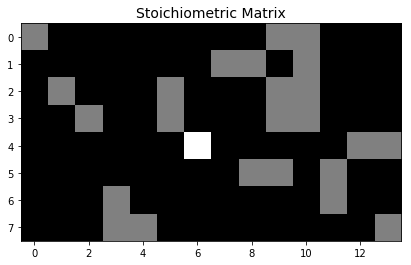


rank = 8


In [22]:
'''2.2 Species and stoichiometric data'''


In [33]:
'''2.2 Compute a reaction rates vector'''


['C2H5ONO', 'CH3CHO', 'C2H5OH', 'CH2=NOH', 'HCN', 'HNO', 'NOH', 'CH2O', 'CH3', 'NO', 'C2H5O', 'CH3NO', 'N2O', 'H2O']
species production rates g_vec = [ 0.519  1.066 -1.274 -0.36   0.41   1.079  2.522 -0.143  1.324  1.859
 -0.272  2.796  1.54   1.419]
reaction rates r_vec = [ 0.581  0.409  0.424 -0.197 -0.395 -0.581 -1.726  0.286]
residual norm ||g - ST r|| = 4.44282e+00


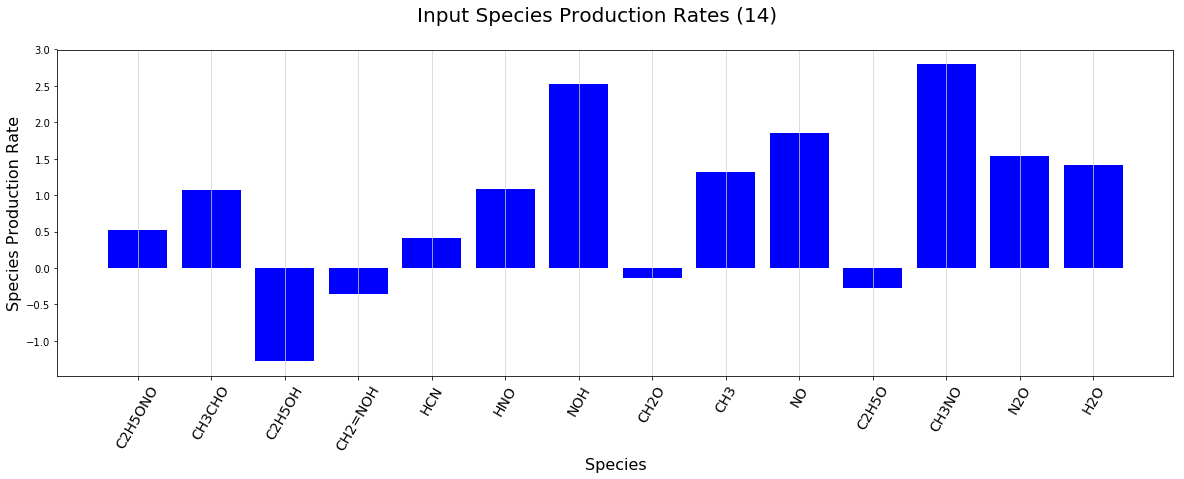

species =  ['C2H5ONO', 'CH3CHO', 'C2H5OH', 'CH2=NOH', 'HCN', 'HNO', 'NOH', 'CH2O', 'CH3', 'NO', 'C2H5O', 'CH3NO', 'N2O', 'H2O']
species production rates g_vec = [ 0.519  1.066 -1.274 -0.36   0.41   1.079  2.522 -0.143  1.324  1.859
 -0.272  2.796  1.54   1.419]


In [34]:
'''2.2 Plot of the input species production rate'''


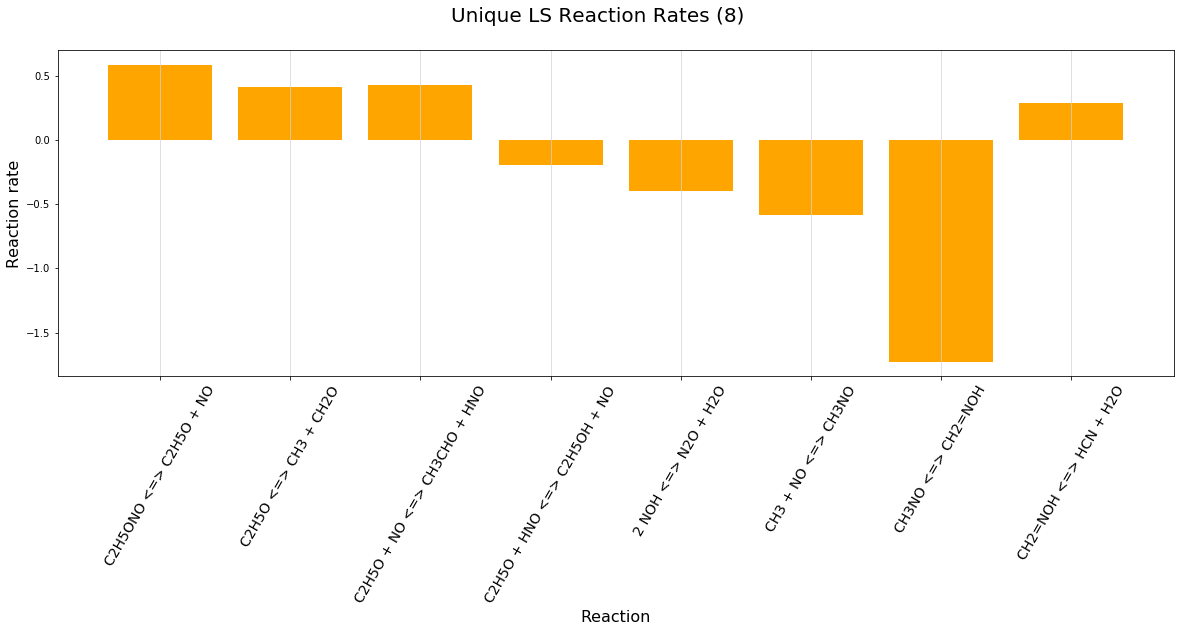

In [35]:
'''2.2 Plot of reaction rates'''


**Meaning of the computed reaction rates vector:** 

<span style="color:blue">
2.3) Create a species production rate density vector $\gvec$ so that a unique least-squares solution to $\Smtrx^\top\,\rvec = \gvec$ exists. Show plots of $\gvec$ and $\rvec_\text{LS}$. Explain why the net reaction rate density vector computed is unique. 
</span><a id="a23"></a>

In [36]:
'''2.3 Compute a reaction rates vector'''


['C2H5ONO', 'CH3CHO', 'C2H5OH', 'CH2=NOH', 'HCN', 'HNO', 'NOH', 'CH2O', 'CH3', 'NO', 'C2H5O', 'CH3NO', 'N2O', 'H2O']
species production rates g_vec = [ 0.809 -0.859  0.17  -0.962  0.605 -1.029  0.52   0.025 -0.025  0.17
 -0.145  0.408 -0.26   0.344]
reaction rates r_vec = [-0.809  0.025 -0.859  0.17  -0.26   0.05  -0.358  0.605]
residual norm ||g - ST r|| = 5.42677e-16


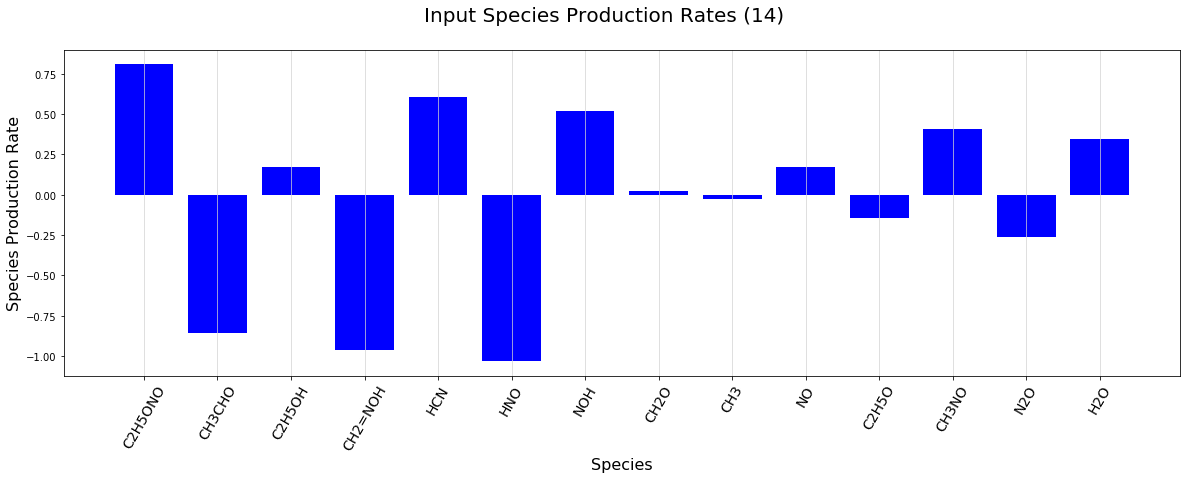

species =  ['C2H5ONO', 'CH3CHO', 'C2H5OH', 'CH2=NOH', 'HCN', 'HNO', 'NOH', 'CH2O', 'CH3', 'NO', 'C2H5O', 'CH3NO', 'N2O', 'H2O']
species production rates g_vec = [ 0.809 -0.859  0.17  -0.962  0.605 -1.029  0.52   0.025 -0.025  0.17
 -0.145  0.408 -0.26   0.344]


In [37]:
'''2.3 Plot of the input species production rate'''


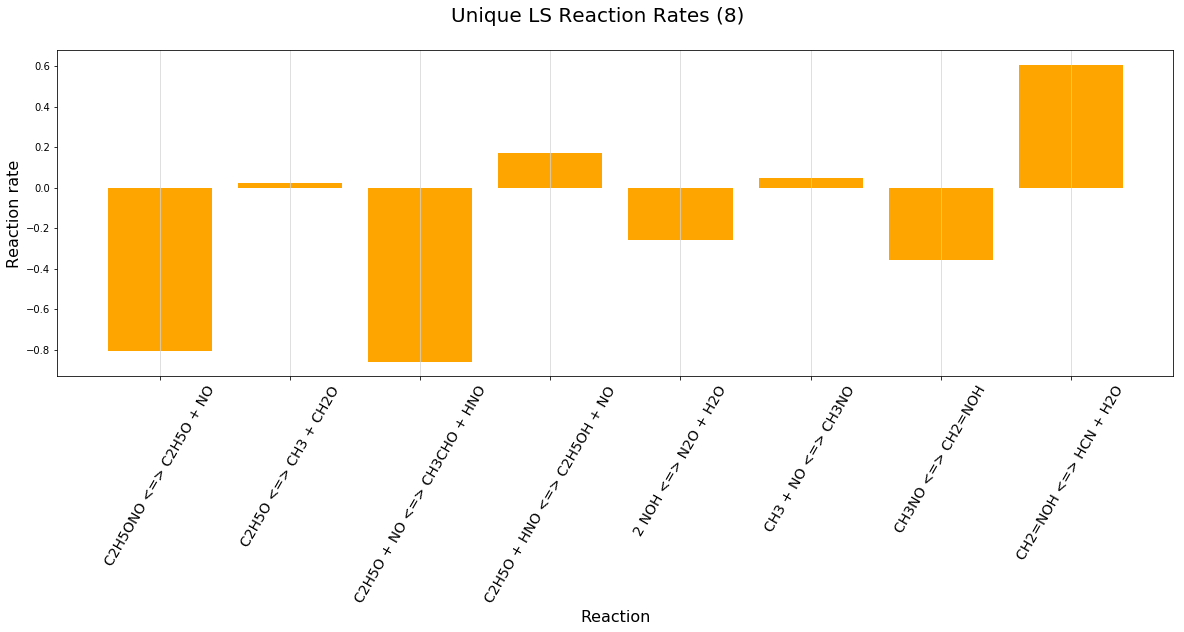

In [38]:
'''2.2 Plot of reaction rates'''


**On the computed reaction rates vector:** .